# Lab 3: Hypothesis Testing and Regression in Python

- **Author:** Li Zeng ([lizeng@uw.edu](mailto:lizeng@uw.edu))
- **Date:** 11 April 2016
- **Course:** INFO 371: Core Methods in Data Science

### Learning Objectives:
By the end of the lab, you will be able to:

* feel comfortably designing formulas for linear regression modeling
* work comfortably with statsmodels library 
* create basic visualization of regression model

### Topics:
1. T-tests
2. Univariate regression
3. Multivariate regressions
4. statsmodels
5. Producing regression tables
6. scikit-learn
7. seaborn

### References: 
 * [Scikit Learn Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)
 * [Statsmodels](http://statsmodels.sourceforge.net/stable/index.html)
 * [Introduction to Statistical Learning, Lab #2](http://www-bcf.usc.edu/~gareth/ISL/Chapter%203%20Lab.txt)

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline  

** Introduce new packages - statsmodels and scipy.stats**

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

### Import Boston Housing data

In [5]:
from sklearn.datasets import load_boston
bdata = load_boston()

** Take a glance at the shape of data **

In [6]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


** Convert data structure **

In [7]:
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]

In [8]:
print boston.head(5)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [9]:
boston['MEDV'] = bdata.target

In [10]:
print boston.head(5)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### 1. T-test 

Using simple differences to examine if there is a significant difference in housing price for the neighborhoods where the tract bounds or doesn't bound the Charles River

In [11]:
river_t = boston[boston.CHAS == 1]
river_f = boston[boston.CHAS == 0]

** Did I correctly split the data? **

In [12]:
print river_t['CHAS'].value_counts()
print river_f['CHAS'].value_counts()

1.0    35
Name: CHAS, dtype: int64
0.0    471
Name: CHAS, dtype: int64


** Doing T-test **

In [13]:
mean_river_t = river_t['MEDV'].mean()
mean_river_f = river_f['MEDV'].mean()

In [14]:
print 'Average price for neighborhoods near the Charles River:\t', mean_river_t
print 'Average price for neighborhoods not near the Charles River:\t', mean_river_f
tstat, pval = stats.ttest_ind(river_t['MEDV'].fillna(0), river_f['MEDV'].fillna(0))
print 't-stat:\t\t\t', tstat
print 'P-value:\t\t', pval

Average price for neighborhoods near the Charles River:	28.44
Average price for neighborhoods not near the Charles River:	22.0938428875
t-stat:			3.99643746609
P-value:		7.39062317052e-05


** What conclusion we can draw from the p-value? **

### 2. Univariate regression

In the Problem Set 1, we explored the relationship between house prices and crime by scatter plot where a negative correlation is evident. 

** Can you use univariate regression to support the finding? **

In [17]:
uni_mod = smf.ols(formula='MEDV ~ CRIM')
uni_result = uni_mod.fit()

Looks like something is wrong above...

** Can you fix it? **

In [16]:
smf.ols?

In [18]:
uni_mod = smf.ols(formula='MEDV ~ CRIM', data=boston)
uni_result = uni_mod.fit()

** View the summary of modeling **

In [19]:
print uni_result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Mon, 11 Apr 2016   Prob (F-statistic):           2.08e-19
Time:                        18:46:43   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     24.0162      0.409     58.676      0.0

** Get estimates of parameters **

In [20]:
print uni_result.params

Intercept    24.016220
CRIM         -0.412775
dtype: float64


** Check the pvalues **

In [21]:
print uni_result.pvalues

Intercept    2.168010e-227
CRIM          2.083550e-19
dtype: float64


In [22]:
print uni_result.pvalues[1]

2.08355011081e-19


** Plot the regression model **

In the Problem Set 1, we got the following plot:

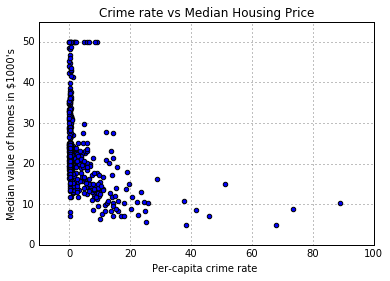

In [34]:
fig, ax = plt.subplots()

ax.scatter(boston['CRIM'], boston['MEDV'])
ax.set_ylabel("Median value of homes in $1000's")
ax.set_xlabel("Per-capita crime rate ")
ax.set_title("Crime rate vs Median Housing Price")
ax.axis([0, 100, 0, 55])
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_xlim(-10,100)
ax.grid(True) # Add grid by setting to True

Add a regression line:

In [24]:
y_hat = uni_result.predict()

In [25]:
print y_hat.shape

(506,)


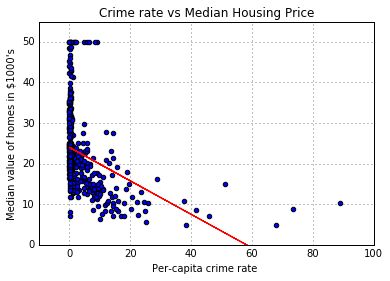

In [33]:
fig, ax = plt.subplots()

ax.plot(boston['CRIM'], y_hat, color = 'red')

ax.scatter(boston['CRIM'], boston['MEDV'])
ax.set_ylabel("Median value of homes in $1000's")
ax.set_xlabel("Per-capita crime rate ")
ax.set_title("Crime rate vs Median Housing Price")
ax.axis([0, 100, 0, 55])
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_xlim(-10,100)
ax.grid(True) # Add grid by setting to True

### 3.  Multivariate regressions

** If we are interested in more than one independent variables, say both crime rates and nitric oxides concentration: **

In [35]:
mul_mod = smf.ols(formula='MEDV ~ CRIM + NOX', data = boston)
mul_result = mul_mod.fit()
print mul_result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     77.13
Date:                Mon, 11 Apr 2016   Prob (F-statistic):           6.06e-30
Time:                        19:04:01   Log-Likelihood:                -1772.6
No. Observations:                 506   AIC:                             3551.
Df Residuals:                     503   BIC:                             3564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     37.6941      1.862     20.245      0.0

** Remove intercept **

In [36]:
no_intcpt_mod = smf.ols(formula='MEDV ~ CRIM + CHAS - 1', data = boston)
no_intcpt_result = no_intcpt_mod.fit()
print no_intcpt_result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     40.15
Date:                Mon, 11 Apr 2016   Prob (F-statistic):           6.60e-17
Time:                        19:04:03   Log-Likelihood:                -2295.7
No. Observations:                 506   AIC:                             4595.
Df Residuals:                     504   BIC:                             4604.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM           0.5425      0.108      5.010      0.0

** Exercise:  **

Create a linear regression between house price and average number of rooms per dwelling; then, create a visualization showing your model

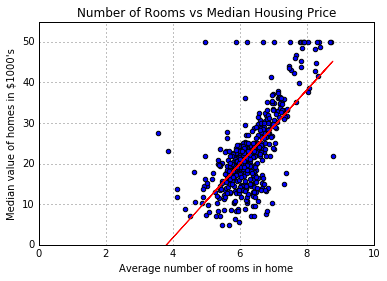

In [42]:
fig, ax = plt.subplots()

rm_mod = smf.ols(formula='MEDV ~ RM', data=boston)
rm_result = rm_mod.fit()

ax.plot(boston['RM'], rm_result.predict(), color = 'red')

ax.scatter(boston['RM'], boston['MEDV'])
ax.set_ylabel("Median value of homes in $1000's")
ax.set_xlabel("Average number of rooms in home")
ax.set_title("Number of Rooms vs Median Housing Price")
ax.axis([0, 100, 0, 55])
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_xlim(0, 10)
ax.grid(True) # Add grid by setting to True

****

** Interaction terms **

In [43]:
itr_mod = smf.ols(formula='MEDV ~ CRIM * CHAS', data = boston)
itr_result = itr_mod.fit()
print itr_result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     36.41
Date:                Mon, 11 Apr 2016   Prob (F-statistic):           2.64e-21
Time:                        19:08:15   Log-Likelihood:                -1790.4
No. Observations:                 506   AIC:                             3589.
Df Residuals:                     502   BIC:                             3606.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.6202      0.418     56.534      0.0

** Non-linear transformation of the predictors **

In [44]:
non_linear_mod = smf.ols(formula='MEDV ~ CRIM + np.power(CRIM, 2)', data = boston)
non_linear_result = non_linear_mod.fit()
print non_linear_result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     65.54
Date:                Mon, 11 Apr 2016   Prob (F-statistic):           5.05e-26
Time:                        19:08:16   Log-Likelihood:                -1781.6
No. Observations:                 506   AIC:                             3569.
Df Residuals:                     503   BIC:                             3582.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            24.8983      0.42

### Tabular representation of regression model

In [45]:
final_mod = smf.ols(formula='MEDV ~ CRIM + NOX + CHAS + np.log(TAX)', data = boston)
final_result = final_mod.fit()
print final_result.summary()

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     53.20
Date:                Mon, 11 Apr 2016   Prob (F-statistic):           2.35e-37
Time:                        19:08:18   Log-Likelihood:                -1750.7
No. Observations:                 506   AIC:                             3511.
Df Residuals:                     501   BIC:                             3533.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      65.0863      6.435     10.115      

In [46]:
print final_result.params

Intercept      65.086319
CRIM           -0.163571
NOX           -17.737318
CHAS            6.459316
np.log(TAX)    -5.491729
dtype: float64


In [47]:
v_name = final_result.params.index

In [48]:
result_df = pd.DataFrame(columns=['Coefficient','Standard Error','P-Value'], index = v_name)
result_df

,Coefficient,Standard Error,P-Value
Intercept,NaN,NaN,NaN
CRIM,NaN,NaN,NaN
NOX,NaN,NaN,NaN
CHAS,NaN,NaN,NaN
np.log(TAX),NaN,NaN,NaN


In [49]:
result_df['Coefficient'] = final_result.params
result_df['Standard Error'] = final_result.bse
result_df['P-Value'] = final_result.pvalues

In [50]:
result_df

,Coefficient,Standard Error,P-Value
Intercept,65.086319,6.434841,5.218527e-22
CRIM,-0.163571,0.048147,7.345392e-04
NOX,-17.737318,4.022184,1.266682e-05
CHAS,6.459316,1.374877,3.396643e-06
np.log(TAX),-5.491729,1.267514,1.780630e-05


### To learn more: Scikit-learn library for linear regression and Seaborn library for visualization

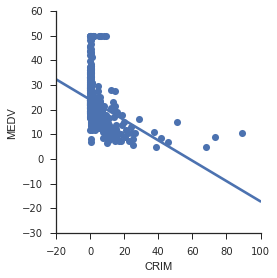

In [52]:
import seaborn as sns
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="CRIM", y="MEDV", data=boston,
            ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

** Exercise:  **

A) Using multiple regression, construct a model of your chosing to examine the relationship between house price other variables in the data set.

In [ ]:
# Edit me!

B) Create a visualization showing your model

In [ ]:
# Edit me!